<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Introduction to machine <br><br><br>learning with scikit-learn<br>
<br><br>Week 3<br></p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Basic concept of machine learning</p>

### Supervised learning 
### Unsupervised learning 
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Linear regression</p>
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Loading datasets</p>
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
An example of reshaping data: the digits dataset</p>
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Learning and predicting</p>



### In this section, we introduce the machine learning vocabulary that we use throughout scikit-learn and provide some simple learning examples.
### In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.
### We can separate learning problems in a few large categories:

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Supervised learning, in which the data comes with additional attributes that we want to predict.</p>

## This problem can be either:

## Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. 
### An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. 
### Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

## Regression: if the desired output consists of one or more continuous variables, then the task is called regression. 
### An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values.</p>
 
### The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.

# Training set and testing set
### Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the training set on which we learn data properties and one that we call the testing set on which we test these properties.

### The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. 

### Across the module, we designate the vector $W$ as coef_ 
### and $w_0$ as intercept_.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
All machine learning models in scikit-learn are implemented in their own class, which are called Estimator classes. The linear regression algorithm is implemented in the LinearRegression class in the linear_model module.</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Before we can use the model, we need to instantiate the class into an object. This is
when we will set any parameters of the model. No parameter is needed.</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
The reg object encapsulates the algorithm to build the model from the training data,
as well the algorithm to make predictions on new data points.</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
It will also hold the information the algorithm has extracted from the training data.
In the case of LinearRegression, it will store the coefficients (coef_) and the intercept (intercept_).</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
We evaluate the model using the score method, that computes the accuracy of the
model. The fit, predict and score methods are the common interface to supervised models in scikit-learn.</p>



In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[0, 0.1], [1.2, 0.8], [1.8, 2.2]], [0.1, 0.8, 1.8])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### LinearRegression will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef_ member:

In [2]:
reg.coef_

array([ 0.22222222,  0.61904762])

In [3]:
reg.intercept_

0.038095238095238071

In [4]:
%matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
#This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')


x1 = [0,1.2,1.8]
x2 = [0.1,0.8,2.2]
y = [0.1, 0.8, 1.8]
z= [0,2]

ax.scatter(x1, x2, y, alpha=0.9, marker = 'o', s = 150, c='r')

slope = reg.coef_
intercept = reg.intercept_

# Create a list of values in the best fit line
abline_values = [slope[0] * x1[i] + slope[1] * x2[i] + intercept for i in z] 


plt.plot([x1[0], x1[2]], [x1[0], x2[2]],[abline_values[0], abline_values[1]],'b')



ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

Using matplotlib backend: Qt5Agg


# Loading example datasets
## scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.
## In the following, we load the iris and digits datasets. 

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [6]:
datasets.__doc__

'\nThe :mod:`sklearn.datasets` module includes utilities to load datasets,\nincluding methods to load and fetch popular reference datasets. It also\nfeatures some artificial data generators.\n'

## A dataset is a dictionary-like object that holds all the data and some metadata about the data. 
### This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. 
### In the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

# An example of reshaping data: the digits dataset
### The digits dataset consists of 1797 images, where each one is an 8x8 pixel image representing a hand-written digit
### In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64. 
### This can be seen as an example of feature extractor

# Parameterized mapping from images to label scores
# with a Linear Classifier

### The first component of this approach is to define the score function that maps the pixel values of an image to confidence scores for each class.
### We have a training set of N = 1797 images, each with D = 8 x 8 = 64 pixels, and K = 10, since there are 10 distinct classes (0, 1, 2, ..., 9 = 10 digits)
### We will define the score function $$f:R^{D}↦R^{K}$$ that maps the raw image pixels to class scores.

In [ ]:
type(digits.data)

In [ ]:
print("n_samples, n_features")
print(digits.data.shape)

In [7]:
digits.images.shape

(1797, 8, 8)

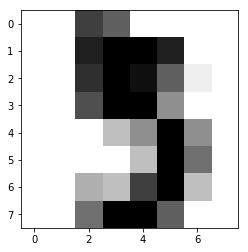

In [2]:
import pylab as pl
pl.imshow(digits.images[5], cmap=pl.cm.gray_r)
pl.show()

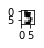

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#Display the first digit
plt.figure(1, figsize=(0.25, 0.25))
plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
digits.data[5]

array([  0.,   0.,  12.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,  14.,
        16.,  16.,  14.,   0.,   0.,   0.,   0.,  13.,  16.,  15.,  10.,
         1.,   0.,   0.,   0.,  11.,  16.,  16.,   7.,   0.,   0.,   0.,
         0.,   0.,   4.,   7.,  16.,   7.,   0.,   0.,   0.,   0.,   0.,
         4.,  16.,   9.,   0.,   0.,   0.,   5.,   4.,  12.,  16.,   4.,
         0.,   0.,   0.,   9.,  16.,  16.,  10.,   0.,   0.])

In [ ]:
print(digits.data)  

In [ ]:
digits.data[0]

In [ ]:
type(digits.data)

### digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [ ]:
digits.target

In [ ]:
digits.target[0:19]

# Shape of the data arrays
The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [ ]:
digits.images[0]

In [ ]:
digits.images[1]

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
The Review of Important Concepts covered in Week 3 </p>

# Learning and Predicting of Multiclass Classification

### In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.
<img src='pixelspace.jpeg' width='50%'>

### The linear classifier has the functional form of  $ f(x_i, W, b) =  W x_i + b$

### In the above equation, we are assuming that the image $x_i$ has all of its pixels flattened out to a single column vector of shape [D x 1]. The matrix W (of size [K x D]), and the vector b (of size [K x 1]) are the parameters of the function. 
### $x_i$ contains all pixels in the i-th image flattened into a single [64 x 1] column, W is [10 x 64] and b is [10 x 1], so 64 numbers come into the function (the raw pixel values) and 10 numbers come out (the class scores). 
### The parameters in W are often called the weights, and b is called the bias vector because it influences the output scores, but without interacting with the actual data $x_i$. 

<img src='imagemap.jpg' width='70%'/>

### An example of mapping an image to class scores. For the sake of visualization, we assume the image only has 4 pixels (4 monochrome pixels, we are not considering color channels in this example here), and that we have 3 classes (red (cat), green (dog), blue (ship) class). 
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
How good is the weight vector $W$ in the example above?</p>

### The linear classifier has the functional form of  $ f(x_i, W, b) =  W x_i + b$

### Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. 
### In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. 
### To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.
<img src='one-vs-rest classifiers.png' width='80%'/>

## How are predictions made based on the three binary linear classifiers shown here?
<br>
## 1. Should we take the one-vs-rest approach based on the binary classifiers? Yes or No?
<br><br><br>
## 2. But what about the little triangle in the middle of the plot where all three binary classifiers classiy points there as "rest"?


<br><br><br><br>

## The binary classifier is not the decision boundry dividing two classes here! It provides a class score and there are 3 class scores provided by 3 binary classifiers.
## Which class would a point in the middle assigned to?
## The one with the highest score provided the classifier.
<img src='decision boundaries from one-vs-rest.png' width='70%'/>


### Unlike this example (with a SVM classifier) which treats the outputs $f(x_i,W,b)$ as (possibly difficult to interpret) scores for each class, the Softmax classifier gives a slightly more intuitive output (normalized class probabilities), which is also why Logistic Regression extends naturally from binary classification to multiclass classification.


### In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

### An example of an estimator is the class sklearn.linear_model.LogisticRegression that implements Logistic Regression Classification. 

### The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box.

### from sklearn.linear_model import LogisticRegression
### model = LogisticRegression()
### clf = model.fit(X_train,y_train)
### Now, we have had our classifier/learner/model trained, we can discord our traing set, evaluate the model, and make prodictions.
### clf.score(X_test, y_test)
### clf.predict(X_new)

<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Introduction to Support <br><br><br>Vector Machines <br><br><br>with scikit-learn<br>
<br><br>Week 12<br></p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
A support vector machine (SVM) is a supervised learning technique from the field of machine learning applicable to both classification and regression.</p>


### In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

### Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

### An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

### In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

# Classification

### Classifying data is a common task in machine learning. 
### Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. 
### In the case of support vector machines, a data point is viewed as a p-dimensional vector (a list of p numbers), and we want to know whether we can separate such points with a (p-1)-dimensional hyperplane. 
### This is called a linear classifier. There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum margin classifier; or equivalently, the perceptron of optimal stability.

### More formally, a support vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

# Choosing the parameters of the model
### In this example we set the value of gamma manually. It is possible to automatically find good values for the parameters by using tools such as grid search and cross validation.
### We call our estimator instance clf, as it is a classifier. 
### It now must be fitted to the model, that is, it must learn from the model. 
### This is done by passing our training set to the fit method. 


## The loss functions we’ll look at in this class are usually defined over very high-dimensional spaces (in this example, a linear classifier weight matrix is of size [10 x 64] for a total of 640 parameters), making them difficult to visualize.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
This is for advanced students only.</p>
### Now, let's explain the piecewise-linear structure of the loss function by examining the math. For a single example we have:

$ L_i = \sum_{j\neq y_i} \left[ \max(0, w_j^Tx_i - w_{y_i}^Tx_i + 1) \right] $

### It is clear from the equation that the data loss for each example is a sum of (zero-thresholded due to the $max(0,−)$ function) linear functions of $W$. Moreover, each row of $W$ (i.e. $w_j$) sometimes has a positive sign in front of it (when it corresponds to a wrong class for an example), and sometimes a negative sign (when it corresponds to the correct class for that example). To make this more explicit, consider a simple dataset that contains three 1-dimensional points and three classes. The full SVM loss (without regularization) becomes:


\begin{align}
L_0 = & \max(0, w_1^Tx_0 - w_0^Tx_0 + 1) + \max(0, w_2^Tx_0 - w_0^Tx_0 + 1) \\\\
L_1 = & \max(0, w_0^Tx_1 - w_1^Tx_1 + 1) + \max(0, w_2^Tx_1 - w_1^Tx_1 + 1) \\\\
L_2 = & \max(0, w_0^Tx_2 - w_2^Tx_2 + 1) + \max(0, w_1^Tx_2 - w_2^Tx_2 + 1) \\\\
L = & (L_0 + L_1 + L_2)/3
\end{align}
### Since these examples are 1-dimensional, the data $x_i$ and weights $w_j$ are numbers. Looking at, for instance, $w_0$, some terms above are linear functions of  $w_0$ and each is clamped at zero. We can visualize this as follows:

<img src='svmbowl.png' width='70%'>

### 1-dimensional illustration of the data loss. The x-axis is a single weight and the y-axis is the loss. The data loss is a sum of multiple terms, each of which is either independent of a particular weight, or a linear function of it that is thresholded at zero. The full SVM data loss is a 640-dimensional version of this shape.

### The linear classifier weight matrix is of size [10 x 64] for a total of 640 parameters

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
The end of advanced section.</p>

### As a training set, let us use all the images of our dataset apart from the last one. 
### We select this training set with the [:-1] Python syntax, which produces a new array that contains all but the last entry of digits.data:

In [ ]:
clf.fit(digits.data[:-1], digits.target[:-1])  

### Now you can predict new values, in particular, we can ask to the classifier what is the digit of our last image in the digits dataset, which we have not used to train the classifier:

In [ ]:
clf.predict(digits.data[-1:])

In [ ]:
#The corresponding image is the following:
pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)
pl.show()

[alt text](image_001.png "Title")

## As you can see, it is a challenging task: the images are of poor resolution. Do you agree with the classifier?

In [ ]:
import matplotlib.pyplot as plt

#Display the first digit
plt.figure(1, figsize=(0.2, 0.2))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Model Evaluation: Quantifying the Quality of Predictions
## Classification Report
### Compute precision, recall, F-measure and support for each class
<img src='tpfp.png' width='70%'/>
#### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#### The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#### The F-beta score weights recall more than precision by a factor of beta, the strength of recall versus precision in the F-score. beta == 1.0 means recall and precision are equally important.
#### The support is the number of occurrences of each class in y_true (Ground truth (correct) target values).

## Confusion Matrix
#### A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

<img src='confusion_matrix.png' width='50%'\>

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        79
          1       0.99      0.96      0.97        80
          2       0.99      0.99      0.99        77
          3       0.97      0.86      0.91        79
          4       0.99      0.95      0.97        83
          5       0.95      0.99      0.97        82
          6       0.99      0.99      0.99        80
          7       0.95      1.00      0.98        80
          8       0.94      1.00      0.97        76
          9       0.94      0.98      0.96        81

avg / total       0.97      0.97      0.97       797


Confusion matrix:
[[78  0  0  0  1  0  0  0  0  0]
 [ 0 77  1  0  0  0  0  0  1  1]
 [ 0  0 76  1  

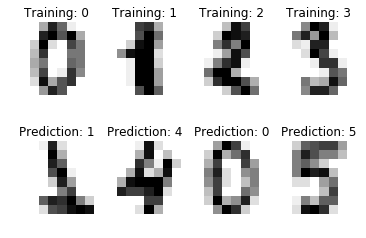

In [10]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first 1000 digits
classifier.fit(data[:1000], digits.target[:1000])

# Now predict the value of the digit on 1001~1797:
expected = digits.target[1000:]
predicted = classifier.predict(data[1000:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[1000:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()